# **Case QuantumFinance - Disciplina NLP - Classificador de chamados**

**Atenção:**
- Leia com atenção o descritivo do trabalho e as orientações do template.
- O trabalho deve ser entregue respeitando a estrutura do arquivo de template em notebook "Template_Trabalho_Final_NLP.ipynb" e compactado no formato .zip. Apenas um arquivo no formato .ipynb deve ser entregue consolidando todo o trabalho.

***Participantes (RM - NOME):***<br>
xxxx - xxxxx<br>
xxxx - xxxxx<br>
xxxx - xxxxx<br>
xxxx - xxxxx<br>

### **Crie um classificador de chamados aplicando técnicas de PLN**
---

A **QuantumFinance** tem um canal de atendimento via chat e precisar classificar os assuntos dos atendimentos para melhorar as tratativas dos chamados dos clientes. O canal recebe textos abertos dos clientes relatando o problema e/ou dúvida e depois é direcionado para alguma área especialista no assunto para uma melhor tratativa.​

1. Crie ao menos um modelo classificador de assuntos aplicando técnicas de NLP (PLN), Vetorização (n-grama + métrica) e modelo supervisionado, que consiga classificar através de um texto o assunto conforme disponível na base de dados [1] para treinamento e validação do seu modelo.​

  O modelo precisar atingir um score na **métrica F1 Score superior a 75%**. Utilize o dataset [1] para treinar e testar o modelo, separe o dataset em duas amostras (75% para treinamento e 25% para teste com o randon_state igual a 42).​

2. Utilizar ao menos uma aplicação de modelos com Embeddings usando Word2Vec e/ou LLM´s para criar o modelo classificador com os critérios do item 1. Não é necessário implementar aplicações usando serviços de API da OpenAI ou outros por exemplo.

Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

**Composição da nota:​**

**50%** - Demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, aplicações de GenIA, organização do pipeline, etc.)​

**50%** - Baseado na performance (score) obtida com a amostra de teste no pipeline do modelo campeão (validar com  a Métrica F1 Score). **Separar o pipeline completo do modelo campeão conforme template.​**

O trabalho poderá ser feito em grupo de 2 até 4 pessoas (mesmo grupo do Startup One) e trabalhos iguais serão descontado nota e passível de reprovação.

**[1] = ​https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv**

**[F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)** com average='weighted'

In [1]:
# CARREGANDO O DATA FRAME
import pandas as pd
df = pd.read_csv('https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv', delimiter=';')

# Façam o download do arquivo e utilizem localmente durante os testes

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         21072 non-null  int64 
 1   data_abertura         21072 non-null  object
 2   categoria             21072 non-null  object
 3   descricao_reclamacao  21072 non-null  object
dtypes: int64(1), object(3)
memory usage: 658.6+ KB


Bom desenvolvimento!

### **Area de desenvolvimento e validações**

Faça aqui as demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, organização do pipeline, etc.)​

Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

In [3]:
print(f"Dataset carregado: {df.shape[0]} registros e {df.shape[1]} colunas")
df.head()

Dataset carregado: 21072 registros e 4 colunas


,id_reclamacao,data_abertura,categoria,descricao_reclamacao
0,3229299,2019-05-01T12:00:00-05:00,Hipotecas / Empréstimos,"Bom dia, meu nome é xxxx xxxx e agradeço se vo..."
1,3199379,2019-04-02T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...
2,3233499,2019-05-06T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,O cartão Chase foi relatado em xx/xx/2019. No ...
3,3180294,2019-03-14T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,"Em xx/xx/2018, enquanto tentava reservar um ti..."
4,3224980,2019-04-27T12:00:00-05:00,Serviços de conta bancária,"Meu neto me dê cheque por {$ 1600,00} Eu depos..."


## **Análise Exploratória dos Dados (EDA)**

Verificação: vocabulário, nulos e validar se há termos representativos por categoria. 

A análise de **frequência das classes**, **comprimento médio** e **n-grams mais frequentes** confirma se bigramas ajudam a capturar contexto (ex: "cartão bloqueado", "empréstimo negado"). 

Detectar **palavras de domínio** que podem virar stopwords personalizadas (ex: "reclamação", "cliente")

In [5]:
# Verificação de valores nulos
print("=== Valores Nulos ===")
print(df.isnull().sum())
print(f"\nTotal de nulos: {df.isnull().sum().sum()}")

# Verificação de duplicados
print(f"\n=== Duplicados ===")
print(f"Registros duplicados: {df.duplicated().sum()}")

# Verificação de textos vazios
print(f"\n=== Textos Vazios ===")
textos_vazios = df['descricao_reclamacao'].str.strip().str.len() == 0
print(f"Textos vazios: {textos_vazios.sum()}")

=== Valores Nulos ===
id_reclamacao           0
data_abertura           0
categoria               0
descricao_reclamacao    0
dtype: int64

Total de nulos: 0

=== Duplicados ===
Registros duplicados: 0

=== Textos Vazios ===
Textos vazios: 0


=== Distribuição de Categorias ===
                                     Quantidade  Percentual (%)
categoria                                                      
Serviços de conta bancária                 5161           24.49
Cartão de crédito / Cartão pré-pago        5006           23.76
Roubo / Relatório de disputa               4822           22.88
Hipotecas / Empréstimos                    3850           18.27
Outros                                     2233           10.60


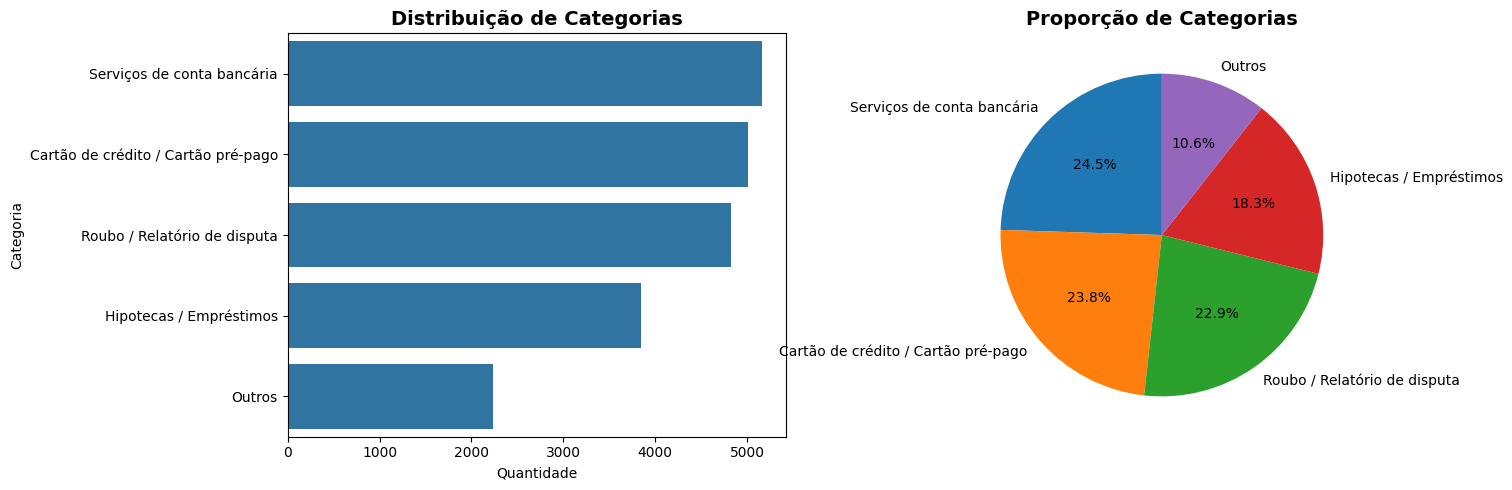


Análise: As classes apresentam leve desbalanceamento — variando de cerca de 10% a 24% dos registros —, mas ainda mantêm proporções suficientemente próximas para um treinamento supervisionado estável.


In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
# Contagem e percentual de cada categoria
print("=== Distribuição de Categorias ===")
categoria_counts = df['categoria'].value_counts()
categoria_percent = df['categoria'].value_counts(normalize=True) * 100

distribuicao = pd.DataFrame({
    'Quantidade': categoria_counts,
    'Percentual (%)': categoria_percent.round(2)
})
print(distribuicao)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
sns.countplot(data=df, y='categoria', order=categoria_counts.index, ax=axes[0])
axes[0].set_title('Distribuição de Categorias', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantidade')
axes[0].set_ylabel('Categoria')

# Gráfico de pizza
axes[1].pie(categoria_counts, labels=categoria_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporção de Categorias', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nAnálise: As classes apresentam leve desbalanceamento — variando de cerca de 10% a 24% dos registros —, mas ainda mantêm proporções suficientemente próximas para um treinamento supervisionado estável.")



=== Estatísticas de Comprimento dos Textos ===

Caracteres:
count    21072.000000
mean      1465.305429
std       1585.890511
min          9.000000
25%        560.000000
50%       1041.000000
75%       1843.250000
max      33897.000000
Name: num_caracteres, dtype: float64

Palavras:
count    21072.000000
mean       247.782413
std        265.400668
min          2.000000
25%         95.000000
50%        177.000000
75%        312.250000
max       5536.000000
Name: num_palavras, dtype: float64


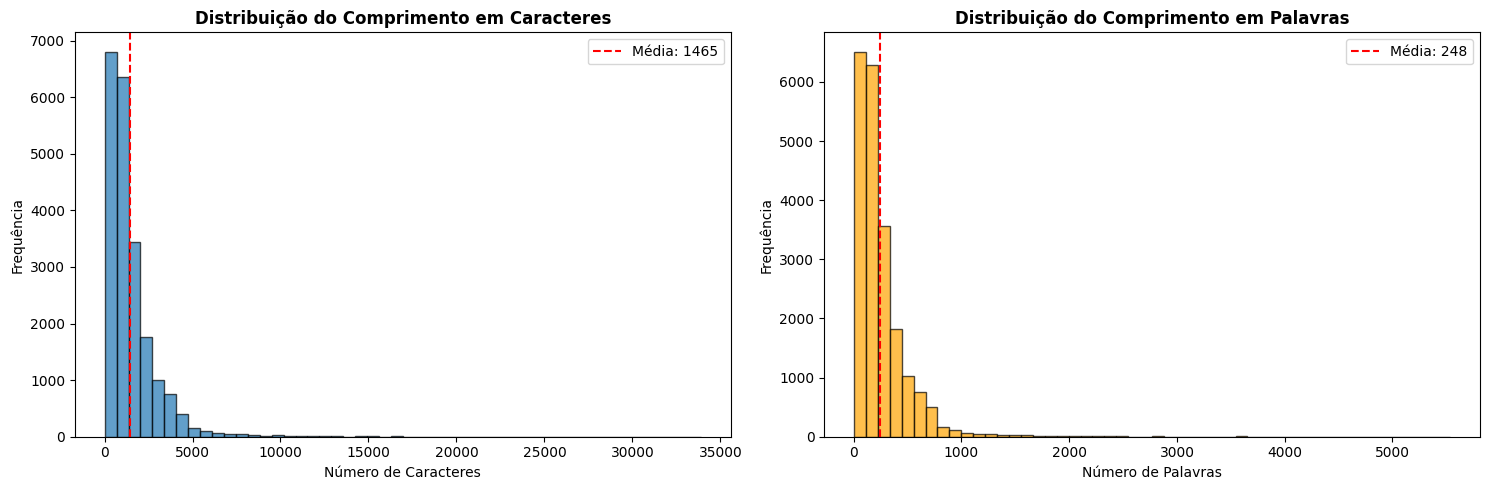


✓ Análise: Os textos são longos (média ~250 palavras), contendo narrativas completas. O pré-processamento deve reduzir ruído e redundância sem eliminar palavras relevantes do domínio financeiro.


In [8]:
# Análise de comprimento em caracteres e palavras
df['num_caracteres'] = df['descricao_reclamacao'].str.len()
df['num_palavras'] = df['descricao_reclamacao'].str.split().str.len()

print("=== Estatísticas de Comprimento dos Textos ===")
print("\nCaracteres:")
print(df['num_caracteres'].describe())
print("\nPalavras:")
print(df['num_palavras'].describe())

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de caracteres
axes[0].hist(df['num_caracteres'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuição do Comprimento em Caracteres', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Número de Caracteres')
axes[0].set_ylabel('Frequência')
axes[0].axvline(df['num_caracteres'].mean(), color='red', linestyle='--', label=f'Média: {df["num_caracteres"].mean():.0f}')
axes[0].legend()

# Histograma de palavras
axes[1].hist(df['num_palavras'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Distribuição do Comprimento em Palavras', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Número de Palavras')
axes[1].set_ylabel('Frequência')
axes[1].axvline(df['num_palavras'].mean(), color='red', linestyle='--', label=f'Média: {df["num_palavras"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n✓ Análise: Os textos são longos (média ~250 palavras), contendo narrativas completas. O pré-processamento deve reduzir ruído e redundância sem eliminar palavras relevantes do domínio financeiro.")

In [10]:
# Função para extrair n-gramas mais frequentes
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Download de recursos necessários do NLTK
nltk.download('stopwords', quiet=True)
nltk.download('rslp', quiet=True)
nltk.download('punkt', quiet=True)

def get_top_ngrams(corpus, n=1, top=20, use_stopwords=False):
    """
    Extrai os n-gramas mais frequentes do corpus
    
    Parâmetros:
    - corpus: lista de textos
    - n: tamanho do n-grama (1=unigrama, 2=bigrama)
    - top: quantidade de n-gramas a retornar
    - use_stopwords: se True, remove stopwords
    """
    # Stopwords customizadas baseadas na EDA
    custom_stopwords = [
        'cliente', 'favor', 'gostaria', 'solicito', 'peço', 'preciso',
        'reclamação', 'reclamações', 'problema', 'problemas',
        'situação', 'situações', 'caso', 'casos',
        'informação', 'informações', 'dados', 'dado',
        'atendimento', 'atendimentos', 'contato', 'contatos',
        'serviço', 'serviços'
    ]

    # Adicionar stopwords em inglês leve
    stopwords_en_light = ['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by']

    # Combinar todas as stopwords em uma LISTA
    stop_words_pt = list(stopwords.words('portuguese')) + custom_stopwords + stopwords_en_light

    # Converter para lista única (remover duplicatas)
    stop_words_pt = list(set(stop_words_pt))

    stop_words = stop_words_pt if use_stopwords else None
    
    vec = CountVectorizer(
        ngram_range=(n, n),
        max_features=top,
        stop_words=stop_words,
        lowercase=True
    ).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return pd.DataFrame(words_freq, columns=['ngrama', 'frequencia'])

# Extrair unigramas e bigramas
print("=== Top 20 Unigramas (SEM remoção de stopwords) ===")
top_unigrams = get_top_ngrams(df['descricao_reclamacao'], n=1, top=20, use_stopwords=False)
print(top_unigrams)

print("\n=== Top 20 Unigramas (COM remoção de stopwords) ===")
top_unigrams_clean = get_top_ngrams(df['descricao_reclamacao'], n=1, top=20, use_stopwords=True)
print(top_unigrams_clean)

print("\n=== Top 20 Bigramas (COM remoção de stopwords) ===")
top_bigrams = get_top_ngrams(df['descricao_reclamacao'], n=2, top=20, use_stopwords=True)
print(top_bigrams)

=== Top 20 Unigramas (SEM remoção de stopwords) ===
   ngrama  frequencia
0      de      235401
1    xxxx      225465
2     que      182265
3    para      102172
4     não       86254
5      em       83908
6      xx       76729
7   chase       67876
8      eu       64006
9      um       63753
10    uma       59844
11    com       56620
12     do       51296
13   eles       51231
14     me       48780
15    meu       46375
16  minha       44026
17  conta       42970
18    por       41751
19     no       40826

=== Top 20 Unigramas (COM remoção de stopwords) ===
        ngrama  frequencia
0         xxxx      225465
1           xx       76729
2        chase       67876
3        conta       42970
4      crédito       31317
5           00       30252
6       cartão       25411
7    pagamento       15578
8     dinheiro       13783
9        disse       13326
10      recebi       12193
11       sobre       12143
12        bank       11672
13       banco       11631
14    disseram       10465
1

In [11]:
# IMPLEMENTAÇÃO: Função de limpeza de tokens mascarados
import re

def clean_masked_tokens(text):
    """
    Remove tokens mascarados específicos do domínio financeiro
    
    Parâmetros:
    - text: texto a ser limpo
    
    Retorna:
    - texto limpo sem tokens mascarados
    """
    if not isinstance(text, str):
        return ""
    
    # Converter para lowercase
    text = text.lower()
    
    # Remover tokens mascarados
    text = re.sub(r'\b[xX]{2,}\b', '', text)  # Remove xxxx, xx
    text = re.sub(r'\b\d{2,}\b', '', text)     # Remove 00, 2020, etc.
    
    # Limpar espaços extras
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Teste da função
texto_teste = "Eu xxxx meu cartão xx foi bloqueado 00 e preciso de ajuda"
print("Teste da função:")
print(f"Original: {texto_teste}")
print(f"Limpo: {clean_masked_tokens(texto_teste)}")

Teste da função:
Original: Eu xxxx meu cartão xx foi bloqueado 00 e preciso de ajuda
Limpo: eu meu cartão foi bloqueado e preciso de ajuda


In [12]:
# APLICAÇÃO: Limpeza de tokens mascarados no dataset
print("=== APLICAÇÃO: Limpeza de Tokens Mascarados ===")

# Aplicar limpeza
df['descricao_limpa'] = df['descricao_reclamacao'].apply(clean_masked_tokens)

# Comparar antes e depois
print("Exemplo de limpeza:")
exemplo_idx = 0
print(f"ANTES: {df['descricao_reclamacao'].iloc[exemplo_idx]}")
print(f"DEPOIS: {df['descricao_limpa'].iloc[exemplo_idx]}")

# Verificar redução de tokens problemáticos
print(f"\nRedução de tokens mascarados:")
print(f"- 'xxxx' antes: {df['descricao_reclamacao'].str.count('xxxx').sum()}")
print(f"- 'xxxx' depois: {df['descricao_limpa'].str.count('xxxx').sum()}")
print(f"- 'xx' antes: {df['descricao_reclamacao'].str.count('xx').sum()}")
print(f"- 'xx' depois: {df['descricao_limpa'].str.count('xx').sum()}")

=== APLICAÇÃO: Limpeza de Tokens Mascarados ===
Exemplo de limpeza:
ANTES: Bom dia, meu nome é xxxx xxxx e agradeço se você puder me ajudar a acabar com os serviços de membro do cartão bancário.
Em 2018, escrevi para Chase solicitar verificação da dívida e o que eles me enviaram uma declaração que não é aceitável. Estou pedindo ao banco que valide a dívida. Em vez disso, recebi e -mails todos os meses, tentando coletar uma dívida.
Tenho o direito de conhecer essas informações como consumidor.

Conta do Chase # xxxx xxxx xxxx xxxx Obrigado antecipadamente pela sua ajuda.
DEPOIS: bom dia, meu nome é e agradeço se você puder me ajudar a acabar com os serviços de membro do cartão bancário. em , escrevi para chase solicitar verificação da dívida e o que eles me enviaram uma declaração que não é aceitável. estou pedindo ao banco que valide a dívida. em vez disso, recebi e -mails todos os meses, tentando coletar uma dívida. tenho o direito de conhecer essas informações como consumidor. conta 

In [16]:
# IMPACTO: Análise de n-gramas após limpeza
print("=== IMPACTO: N-gramas Após Limpeza ===")

# Re-analisar n-gramas com texto limpo
print("Top 20 Unigramas APÓS limpeza de tokens mascarados:")
top_unigrams_clean = get_top_ngrams(df['descricao_limpa'], n=1, top=20, use_stopwords=True)
print(top_unigrams_clean)

print("Top 20 Bigramas APÓS limpeza de tokens mascarados:")
top_bigrams = get_top_ngrams(df['descricao_limpa'], n=1, top=20, use_stopwords=True)
print(top_bigrams)

print("\nComparação:")
print("ANTES: Tokens mascarados dominavam (xxxx, xx)")
print("DEPOIS: Termos de domínio aparecem (chase, bank, crédito, cartão)")
print("\nJustificativa: Durante a etapa de normalização, foram removidos tokens mascarados (como “xxxx”, “xx”, “00”), comuns em bases financeiras para anonimização de dados.")
print("\n A remoção de mascaramentos garante que o modelo aprenda padrões semânticos reais (como “crédito”, “cartão”, “empréstimo”) em vez de ruído gerado por anonimizações.")

=== IMPACTO: N-gramas Após Limpeza ===
Top 20 Unigramas APÓS limpeza de tokens mascarados:
        ngrama  frequencia
0        chase       67876
1        conta       42970
2      crédito       31317
3       cartão       25411
4    pagamento       15578
5     dinheiro       13783
6        disse       13326
7       recebi       12193
8        sobre       12143
9         bank       11672
10       banco       11631
11    disseram       10465
12       nunca       10099
13      porque        9794
14       então        9733
15      liguei        9342
16  empréstimo        9232
17       fazer        9163
18       havia        8585
19        dias        8541
Top 20 Bigramas APÓS limpeza de tokens mascarados:
        ngrama  frequencia
0        chase       67876
1        conta       42970
2      crédito       31317
3       cartão       25411
4    pagamento       15578
5     dinheiro       13783
6        disse       13326
7       recebi       12193
8        sobre       12143
9         bank       

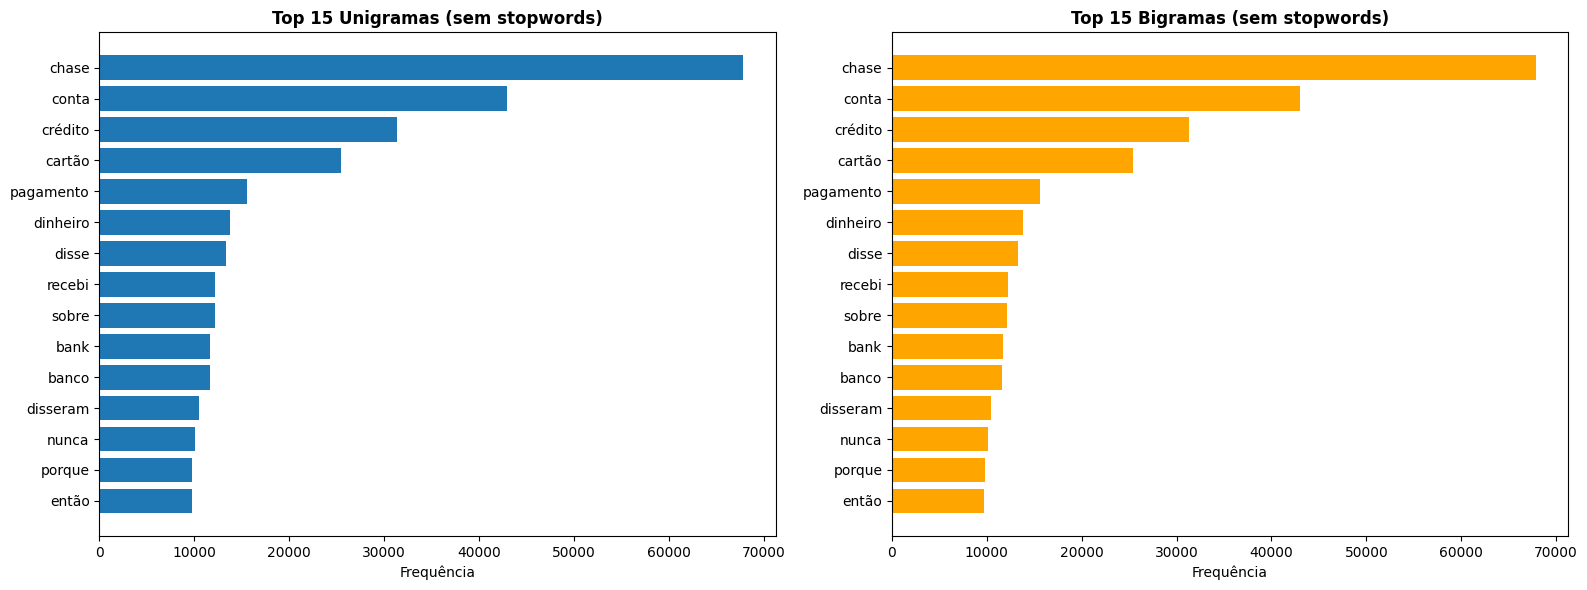


✓ Decisão: Bigramas capturam contextos importantes do domínio financeiro (ex: 'conta corrente', 'cartão crédito').
  Utilizaremos ngram_range=(1,2) nos experimentos com TF-IDF.


In [17]:
# Visualização dos n-gramas mais frequentes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Unigramas
axes[0].barh(top_unigrams_clean['ngrama'][:15][::-1], top_unigrams_clean['frequencia'][:15][::-1])
axes[0].set_title('Top 15 Unigramas (sem stopwords)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Frequência')

# Bigramas
axes[1].barh(top_bigrams['ngrama'][:15][::-1], top_bigrams['frequencia'][:15][::-1], color='orange')
axes[1].set_title('Top 15 Bigramas (sem stopwords)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Frequência')

plt.tight_layout()
plt.show()

print("\n✓ Decisão: Bigramas capturam contextos importantes do domínio financeiro (ex: 'conta corrente', 'cartão crédito').")
print("  Utilizaremos ngram_range=(1,2) nos experimentos com TF-IDF.")

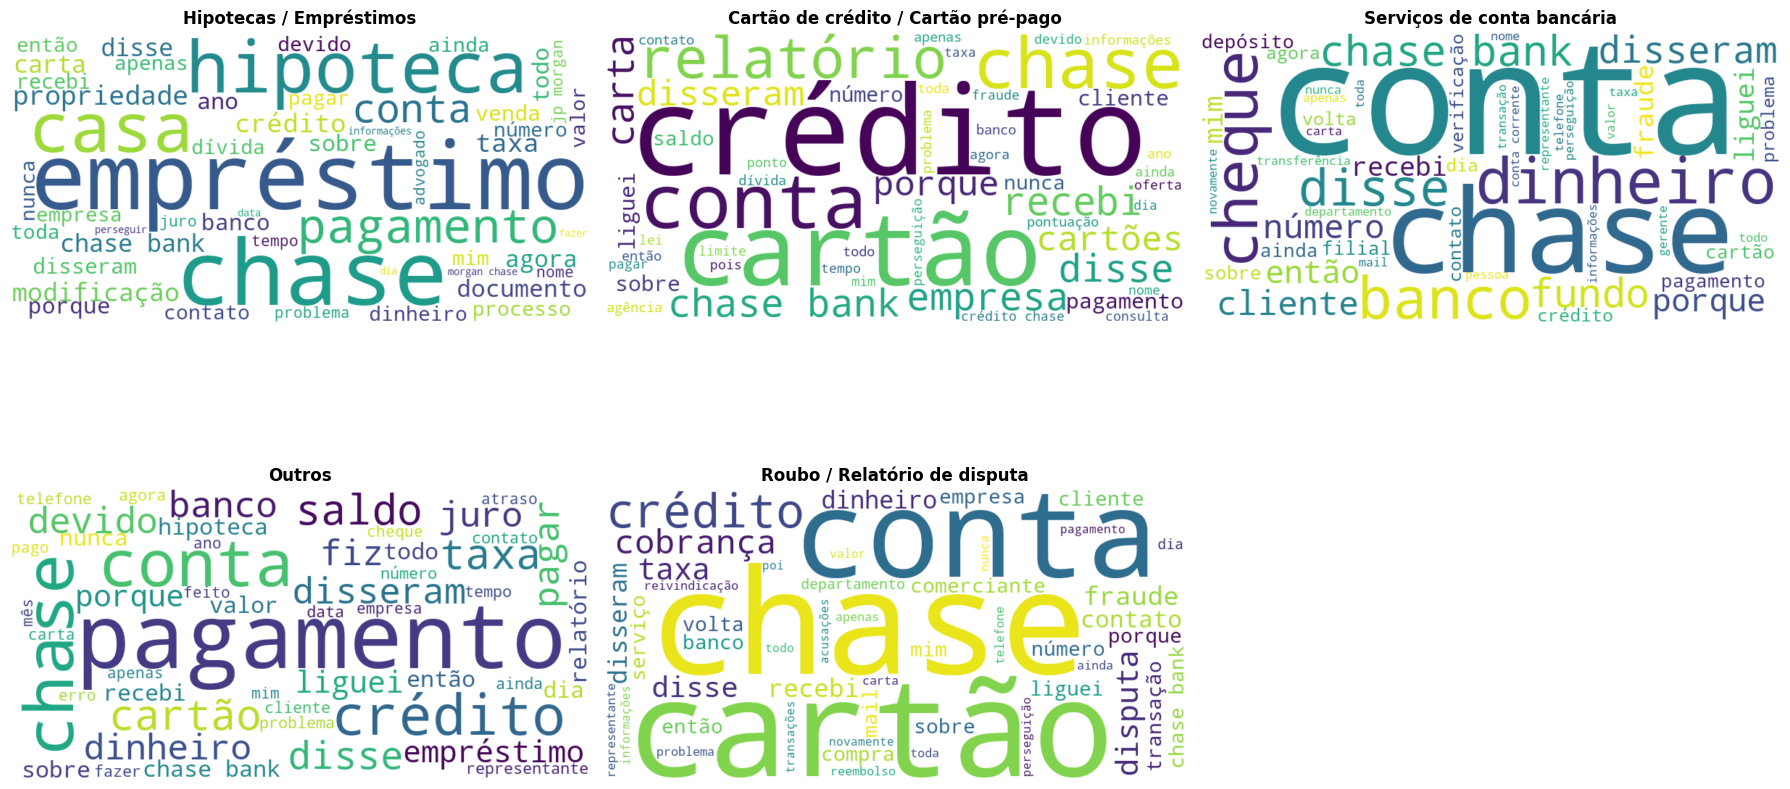

✓ As nuvens de palavras evidenciam termos característicos de cada categoria.


In [20]:
# Nuvem de palavras para cada categoria 
from wordcloud import WordCloud


categorias = df['categoria'].unique()
stop_words_pt = set(stopwords.words('portuguese'))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, categoria in enumerate(categorias):
    texto = ' '.join(df[df['categoria'] == categoria]['descricao_limpa'])
    
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        stopwords=stop_words_pt,
        max_words=50,
        colormap='viridis'
    ).generate(texto)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(categoria, fontsize=12, fontweight='bold')
    axes[idx].axis('off')

# Remover subplot extra se houver
if len(categorias) < 6:
    for idx in range(len(categorias), 6):
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("✓ As nuvens de palavras evidenciam termos característicos de cada categoria.")


### Separação Treino/Teste (75%/25%)

**random_state=42** e split **estratificado** para manter a proporção das classes.

In [ ]:
# Separação estratificada dos dados
from sklearn.model_selection import train_test_split


X = df['descricao_reclamacao']
y = df['categoria']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print(f"Conjunto de Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Conjunto de Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribuição de classes no treino:")
print(y_train.value_counts())

### **Validação do professor**

Consolidar apenas os scripts do seu **modelo campeão**, desde o carregamento do dataframe, separação das amostras, tratamentos utilizados (funções, limpezas, etc.), criação dos objetos de vetorização dos textos e modelo treinado e outras implementações utilizadas no processo de desenvolvimento do modelo.

O modelo precisar atingir um score na métrica F1 Score superior a 75%.

**Atenção:**
- **Implemente aqui apenas os scripts que fazem parte do modelo campeão.**
- **Execute o pipeline do modelo campeão completamente para garantir que não tetá erros no script.**
